## 1.4.10 Histograms in OpenCV

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

In [5]:
def plt_image(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [2]:
img = cv2.imread('dsu4.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

In [6]:
print(np.transpose(hist))

[[0.000e+00 0.000e+00 1.000e+00 2.000e+00 1.400e+01 8.300e+01 2.720e+02
  7.480e+02 1.363e+03 2.015e+03 2.417e+03 2.779e+03 2.760e+03 2.775e+03
  2.889e+03 3.189e+03 3.592e+03 4.078e+03 4.465e+03 4.375e+03 4.434e+03
  4.231e+03 4.277e+03 4.227e+03 4.485e+03 4.568e+03 4.404e+03 4.231e+03
  4.264e+03 4.098e+03 3.946e+03 3.839e+03 3.720e+03 3.713e+03 3.676e+03
  3.748e+03 3.862e+03 3.943e+03 4.131e+03 4.120e+03 4.057e+03 3.951e+03
  3.736e+03 3.598e+03 3.610e+03 3.523e+03 3.634e+03 3.763e+03 4.150e+03
  4.460e+03 4.982e+03 5.456e+03 5.992e+03 6.510e+03 6.975e+03 7.123e+03
  7.180e+03 7.420e+03 7.412e+03 7.301e+03 7.213e+03 6.856e+03 6.679e+03
  6.238e+03 5.958e+03 5.913e+03 5.907e+03 5.745e+03 6.048e+03 6.024e+03
  6.298e+03 6.398e+03 6.319e+03 6.287e+03 6.355e+03 6.183e+03 6.197e+03
  6.242e+03 6.283e+03 6.483e+03 6.637e+03 6.918e+03 6.895e+03 6.818e+03
  6.887e+03 6.663e+03 6.197e+03 5.703e+03 5.347e+03 4.925e+03 4.673e+03
  4.519e+03 4.172e+03 4.014e+03 3.786e+03 3.669e+03 3.518e+03 3.

In [7]:
hist = np.bincount(img.ravel(),minlength=256)

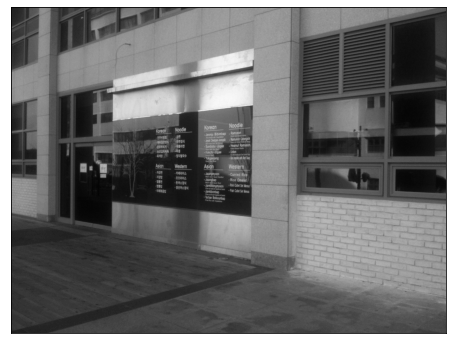

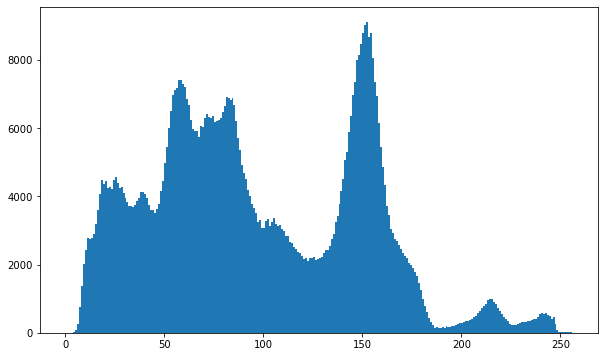

In [15]:
plt_image(img)

plt.hist(img.ravel(),256,[0,256]); 
plt.show()

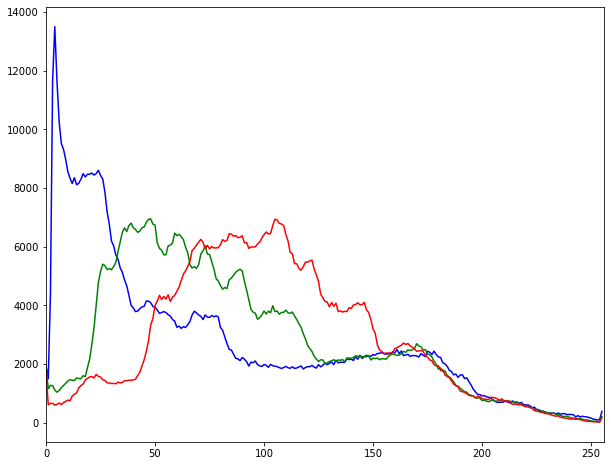

In [26]:
img = cv2.imread('download.png')
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

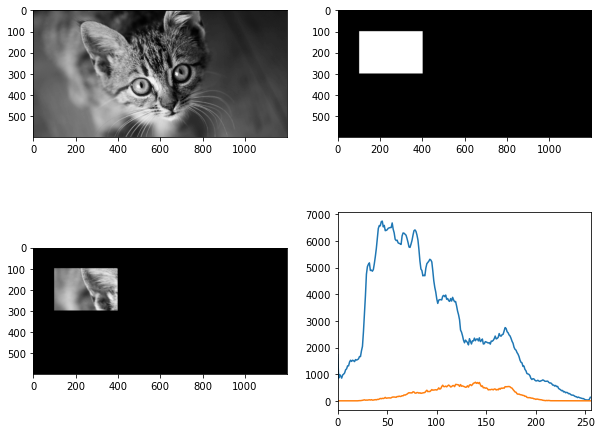

In [25]:
img = cv2.imread('download.png',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

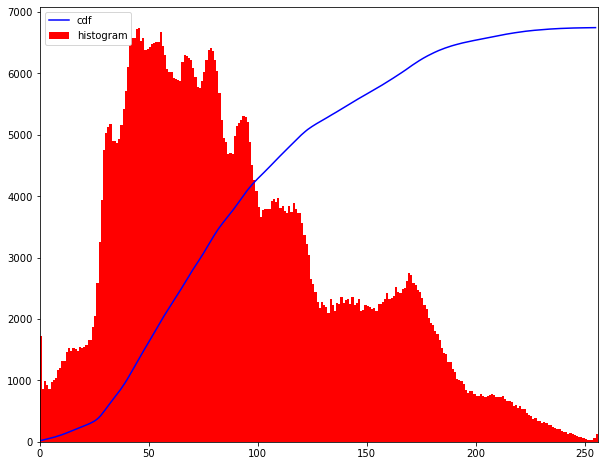

In [33]:
img = cv2.imread('download.png',0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [38]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

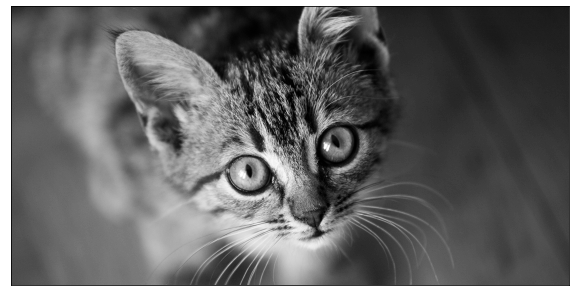

In [40]:
plt_image(img)

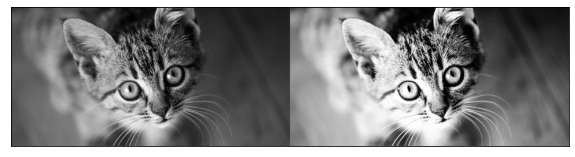

In [44]:
img = cv2.imread('download.png',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))

plt_image(res)